In [1]:
# 0. import the needed packages
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [7]:
# 1. Read the data points
my_data = pd.read_csv('Simple_data_points_for_PNN.csv', sep=';',header=0)
cleaned_data = np.array([ my_data['Feature 1'].tolist(),my_data['Feature 2'].tolist()]).T

In [8]:
# 2. Declare the needed variable 
groups = my_data.groupby('Class')
number_of_classes = len(groups)  # Here we have 3 different classes
dictionary_of_sum = {}
numrber_of_features  = 2 # We have feature 1 and feature 2 
sigma = 1
increament_current_row_in_matrix = 0

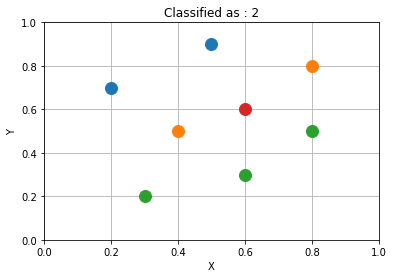

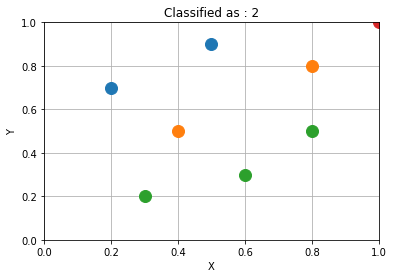

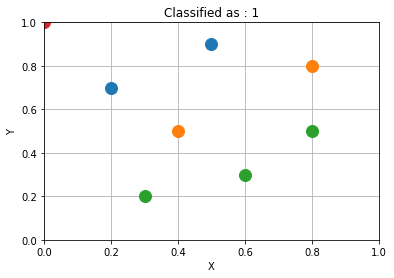

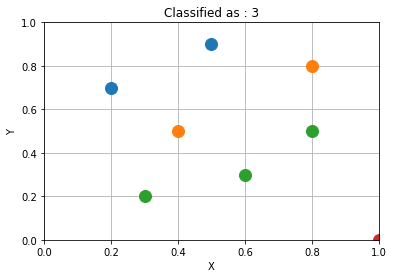

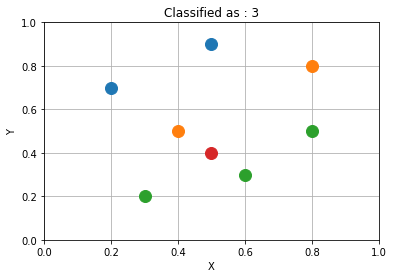

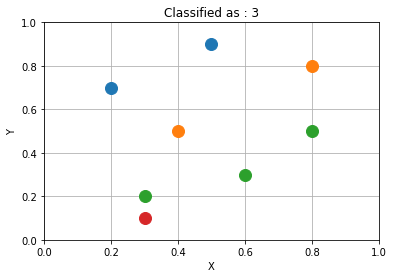

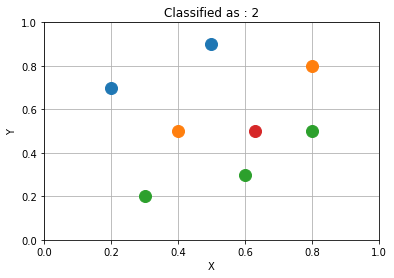

In [9]:
# 3. Loop via the number of data points that we wish to classifiy 
array_of_points  = [ [0.6,0.6],[1,1],[0,1],[1,0], [0.5,0.4],[0.3,0.1],[0.63,0.5]  ]
for x in array_of_points:
	point_want_to_classify = x

	# **INPUT LAYER OF THE PNN **
	# 4. Loop via number of classes 
	increament_current_row_in_matrix = 0
	for k in range(1,number_of_classes+1):

		# 4.1 Initiate the sume to zero 
		dictionary_of_sum[k] = 0
		number_of_data_point_from_class_k = len(groups.get_group(k))

		# ** PATTERN LAYER OF PNN **
		# 5. Loop via the number of training example in class i 
		product = 0.0

		for i in range(1,number_of_data_point_from_class_k+1):

			tempx = (point_want_to_classify[0] - cleaned_data[increament_current_row_in_matrix][0]) * (point_want_to_classify[0] - cleaned_data[increament_current_row_in_matrix][0]) 
			tempy = (point_want_to_classify[1] - cleaned_data[increament_current_row_in_matrix][1]) * (point_want_to_classify[1] - cleaned_data[increament_current_row_in_matrix][1]) 

			temp_sum = -1 * (tempx + tempy)
			temp_sum = temp_sum/( 2 * np.power(sigma,2) )

			product = product + temp_sum
			increament_current_row_in_matrix  = increament_current_row_in_matrix + 1

		dictionary_of_sum[k]  = product 

	# 
	classified_class = str( max(dictionary_of_sum, key=dictionary_of_sum.get) )

	# 
	groups = my_data.groupby('Class')

	# Drawing the graph
	fig, ax = plt.subplots()
	ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
	for name, group in groups:
	    ax.plot(group['Feature 1'], group['Feature 2'], marker='o', linestyle='', ms=12, label=name)

	# Draw the unclassified data point 
	ax.plot(point_want_to_classify[0], point_want_to_classify[1], marker='o', linestyle='', ms=12)

	# Setting the limit of x and y axis
	axes = plt.gca()
	axes.set_xlim([0,1])
	axes.set_ylim([0,1])
	plt.title('Classified as : ' + str(classified_class) )
	plt.xlabel('X')
	plt.ylabel('Y')

	# Giving a grid and show the plot
	plt.grid()
	plt.show()

	import time
	time.sleep(1)


# ------- END OF THE CODE ---